<a href="https://colab.research.google.com/github/SophGrace24/K_Means_Events/blob/main/Neural_Network_Attempt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import os

In [3]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file('flower_photos', origin = dataset_url, untar = True)


# Downloading the data
This may or may not be important for logging but this is me just downloading the data.

In [4]:
# Image and Batch parameters
batch_size = 32
img_height = 180
img_width = 180


In [5]:
# Creating the training data set, 70% of the data
train_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, 'flower_photos'), # Corrected path
    validation_split = 0.3,
    subset = "training",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 2569 files for training.


# I want to state
This project is more of a literal project rather than a finished piece.
I've been exploring different methods of data augmentation, different epochs and different units assigned to each layer. At the bottom, I'll deliver my final report.

In [6]:
#Creating Validation Dataset - 20%
val_dataset = tf.keras.utils.image_dataset_from_directory(
    os.path.join(data_dir, 'flower_photos'), # Corrected path
    validation_split = 0.3,
    subset = "validation",
    seed = 123,
    image_size = (img_height, img_width),
    batch_size = batch_size)

Found 3670 files belonging to 5 classes.
Using 1101 files for validation.


In [7]:
#Names of flower types
class_names = train_dataset.class_names
print(f"class_names: {class_names}")
print(f"Number of classes: {len(class_names)}")

class_names: ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']
Number of classes: 5


# Troublshooting
This code block with import os is my fix for why I couldn't upload the data with the given class names. It was only giving me flower_images. However, with this codeblock, I managed to get the class names figured out! For integrity sake, I'll admit that this codeblock was provided by Gemini because I COULDNT figure it out.

In [8]:
import os

# List the contents of the data_dir
print(os.listdir(data_dir))

# List the contents of the subdirectory within data_dir
# Assuming there is only one subdirectory as per the current output
if len(os.listdir(data_dir)) > 0:
    first_subdir = os.path.join(data_dir, os.listdir(data_dir)[0])
    if os.path.isdir(first_subdir):
        print(f"\nContents of {first_subdir}:")
        print(os.listdir(first_subdir))

['flower_photos']

Contents of /root/.keras/datasets/flower_photos/flower_photos:
['dandelion', 'tulips', 'sunflowers', 'daisy', 'roses', 'LICENSE.txt']


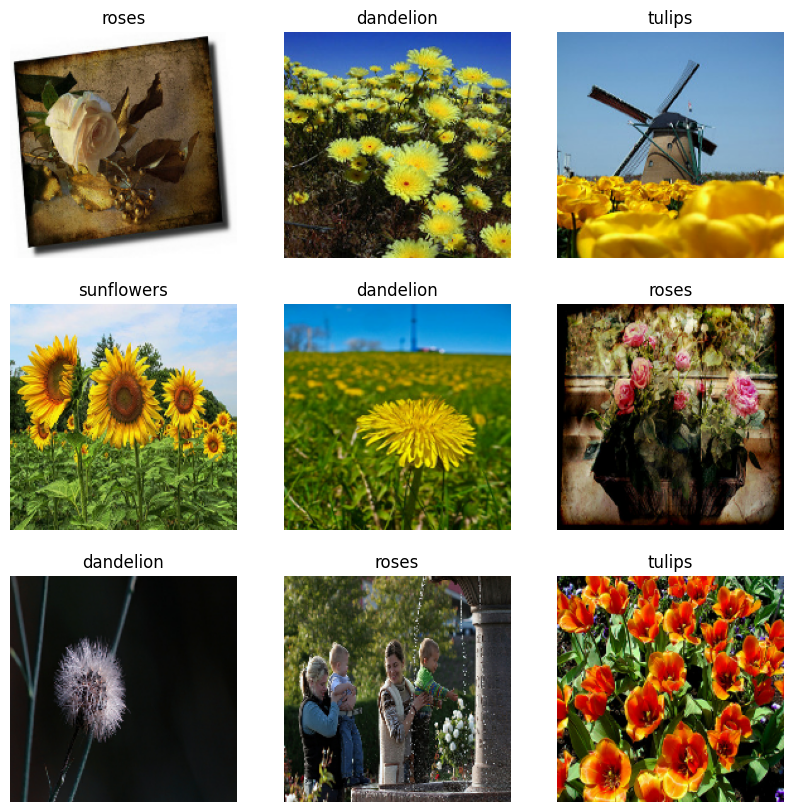

In [9]:
#Look at a few images of pretty flowers <3
plt.figure(figsize=(10,10))
for images, labels in train_dataset.take(1): #batch
  for i in range(9):
    ax = plt.subplot(3,3,i+1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
plt.show()

In [10]:
AUTOTUNE = tf.data.AUTOTUNE
train_dataset = train_dataset.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [11]:
num_classes = len(class_names)

In [12]:
model = tf.keras.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),

    layers.Conv2D(16,(3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(64,(3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Conv2D(128, (3,3), padding = 'same', activation = 'relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dropout(0.25),

    layers.Dense(128, activation = 'relu'),

    layers.Dense(num_classes, activation = 'softmax')



])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
print("Model has been compiled.")

Model has been compiled.


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip (RandomFlip)        │ (None, 180, 180, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation                 │ (None, 180, 180, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 180, 180, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 90, 90, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 90, 90, 64)     │         9,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 45, 45, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 45, 45, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 22, 22, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 61952)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     7,929,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,014,213 (30.57 MB)

 Trainable params: 8,014,213 (30.57 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
epochs = 10
history = model.fit(
    train_dataset,
    validation_data = val_dataset,
    epochs = epochs)

Epoch 1/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 177s 2s/step - accuracy: 0.3106 - loss: 1.9349 - val_accuracy: 0.4614 - val_loss: 1.2649
Epoch 2/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.5132 - loss: 1.1768 - val_accuracy: 0.5595 - val_loss: 1.0943
Epoch 3/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 203s 2s/step - accuracy: 0.5990 - loss: 1.0316 - val_accuracy: 0.5858 - val_loss: 1.0068
Epoch 4/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 202s 2s/step - accuracy: 0.6264 - loss: 0.9426 - val_accuracy: 0.6167 - val_loss: 0.9633
Epoch 5/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.6472 - loss: 0.9104 - val_accuracy: 0.6076 - val_loss: 0.9648
Epoch 6/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 165s 2s/step - accuracy: 0.6799 - loss: 0.8279 - val_accuracy: 0.6530 - val_loss: 0.9034
Epoch 7/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.6652 - loss: 0.8498 - val_accuracy: 0.6748 - val_loss: 0.8495
Epoch 8/10
81/81 ━━━━━━━━━━━━━━━━━━━━ 162s 2s/step - accuracy: 0.6971 - loss: 0.7833 - val_accuracy: 0.6658 - v

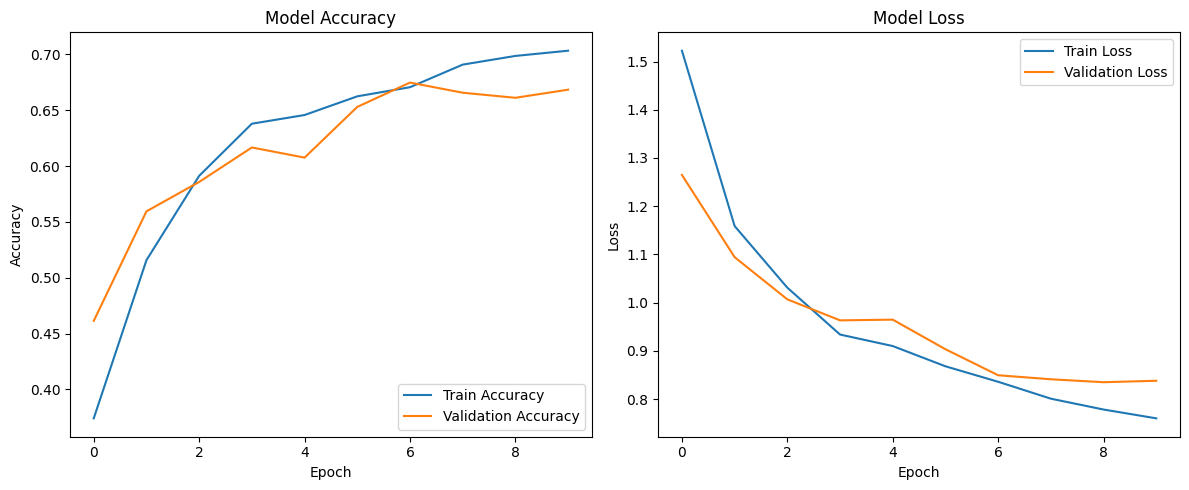

In [16]:
import matplotlib.pyplot as plt


# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

# Plot training & validation loss values
plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

plt.tight_layout() # Adjust layout to prevent overlap
plt.show()

In [17]:
print("\nEvaluating model on validation data...")
loss, accuracy = model.evaluate(val_dataset)
print(f"Final Validation Accuracy: {accuracy*100:.2f}%")
print(f"Final Validation Loss: {loss:.4f}")


Evaluating model on validation data...
35/35 ━━━━━━━━━━━━━━━━━━━━ 16s 462ms/step - accuracy: 0.6463 - loss: 0.8776
Final Validation Accuracy: 66.85%
Final Validation Loss: 0.8381


# This code
Is not the best one I've implemented for this project. In my first attempt, I overfit the model to the data so it did poorly on the testing.
The second time, I over-aggressively applied data augmentation.
The third time, well, this is the third time. It is not very accurate but the learning experience was invaluable. But, visualizations never hurt anyone.


Making predictions on a batch of validation images...
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step


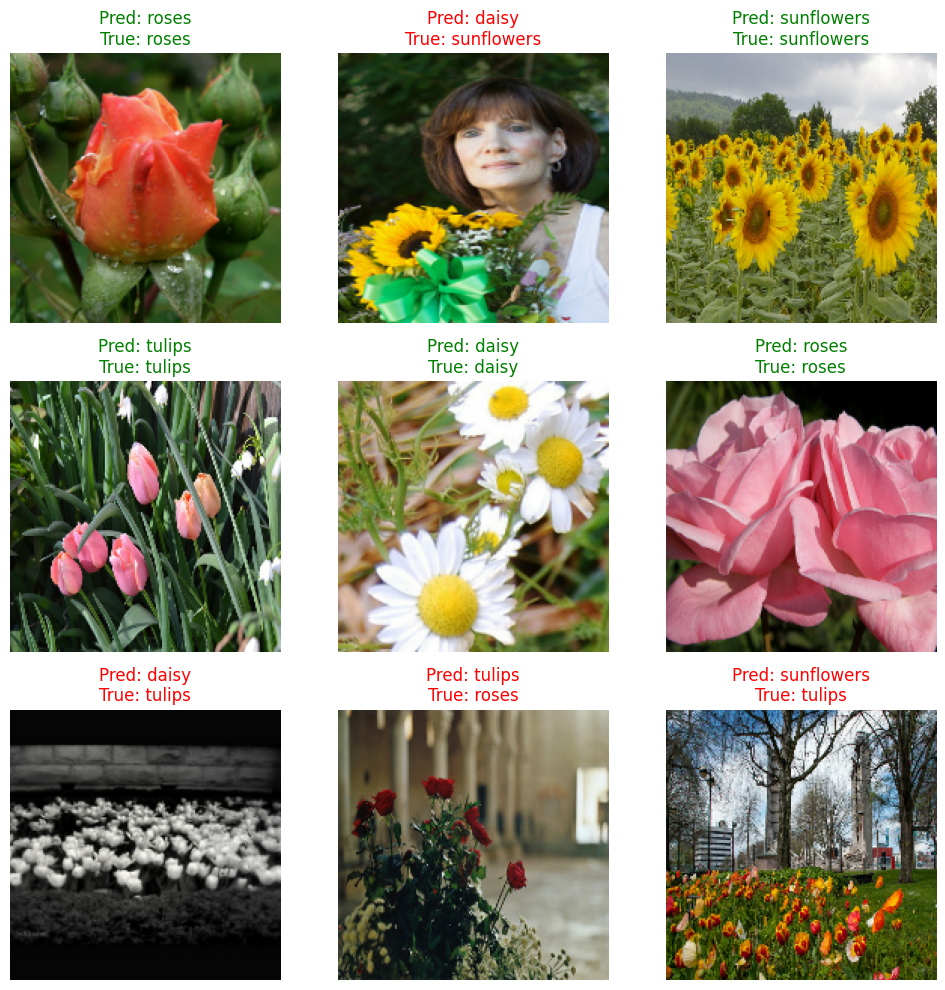

In [18]:
import numpy as np

print("\nMaking predictions on a batch of validation images...")
# Get a batch of images and labels from the validation set
image_batch, label_batch = next(iter(val_dataset))

# Make predictions
predictions = model.predict(image_batch)

plt.figure(figsize=(10, 10)) # Adjust as needed
for i in range(9): # Display first 9 images in the batch
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(image_batch[i].numpy().astype("uint8"))

    predicted_class_index = np.argmax(predictions[i])
    predicted_class_name = class_names[predicted_class_index]
    true_class_name = class_names[label_batch[i]]

    plt.title(f"Pred: {predicted_class_name}\nTrue: {true_class_name}",
              color=("green" if predicted_class_name == true_class_name else "red"))
    plt.axis("off")
plt.tight_layout()
plt.show()